In [205]:
import os
import re
import importlib

import matplotlib.pyplot as plt

import data_utils

importlib.reload(data_utils)

<module 'data_utils' from '/Users/jkamalu/Documents/Masters/Project/Automesh/automesh/data_utils.py'>

## Load and preprocess the data

In [206]:
database = "/Users/jkamalu/Downloads/BosphorusDB"

In [207]:
data = {} # uid-key -> config-key -> (landmarks, data)

id_pattern = re.compile(r"bs[0-9]{3}")
uids = [f for f in os.listdir(database) if id_pattern.findall(f)]

for uid in sorted(uids):
    uid_folder = os.path.join(database, uid)
    if not os.path.isdir(uid_folder): continue
    data[uid] = data_utils.process_uid(uid_folder)

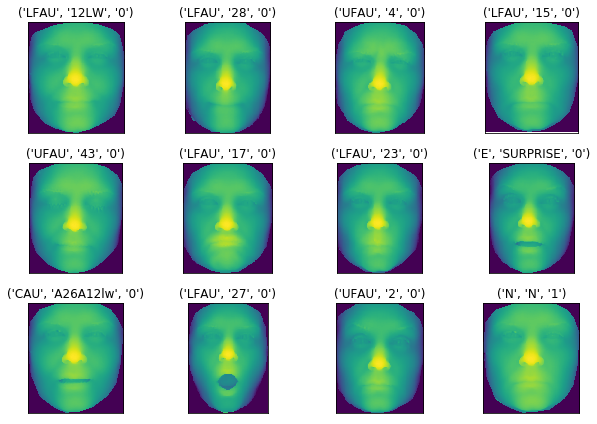

In [242]:
uid = "bs000"

configs = list(filter(lambda config: config[0] not in ["YR", "PR", "CR", "O"], data[uid]))

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(9, 6), subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(left=0.03, right=0.97, hspace=0.3, wspace=0.05)

for ax, config in zip(axs.flat, configs):
    _, points = data[uid][config]
    min_vals = np.sort(np.unique(points[:, :, 2]))
    points[points == min_vals[0]] = min_vals[1]
    ax.imshow(points[:, :, 2])
    ax.set_title(str(config))

plt.tight_layout()
plt.show()